In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statistics


In [2]:
rain=pd.read_csv('data/rain_data_aus.csv')

In [3]:
rain.isna().sum()

date                    0
location                0
mintemp               637
maxtemp               322
rainfall             1406
evaporation         60843
sunshine            67816
humidity9am          1774
humidity3pm          3610
pressure9am         14014
pressure3pm         13981
cloud9am            53657
cloud3pm            57094
temp9am               904
temp3pm              2726
raintoday            1406
amountOfRain            0
raintomorrow            0
temp                  322
humidity             3610
precipitation3pm        0
precipitation9am        0
modelo_vigente          0
dtype: int64

In [4]:
rain=rain.dropna()

In [5]:
rain[['raintomorrow','raintoday']]

,raintomorrow,raintoday
5939,No,No
5940,No,No
5942,No,No
5943,No,No
5944,No,No
...,...,...
139108,No,No
139109,No,No
139110,No,No
139111,No,No


In [6]:
rain['raintomorrow']=rain['raintomorrow'].replace({'No':0,'Yes':1})
rain['raintoday']=rain['raintoday'].replace({'No':0,'Yes':1})

In [7]:
rain[['raintomorrow','raintoday']]

,raintomorrow,raintoday
5939,0,0
5940,0,0
5942,0,0
5943,0,0
5944,0,0
...,...,...
139108,0,0
139109,0,0
139110,0,0
139111,0,0


In [8]:
rain.corr()['raintomorrow']

mintemp             0.088964
maxtemp            -0.144498
rainfall            0.253773
evaporation        -0.127257
sunshine           -0.449261
humidity9am         0.265360
humidity3pm         0.447742
pressure9am        -0.255934
pressure3pm        -0.231428
cloud9am            0.319410
cloud3pm            0.389891
temp9am            -0.016180
temp3pm            -0.181295
raintoday           0.308621
amountOfRain        0.492611
raintomorrow        1.000000
temp               -0.112636
humidity            0.406002
precipitation3pm    0.006578
precipitation9am   -0.013366
modelo_vigente      0.863107
Name: raintomorrow, dtype: float64

In [9]:
#amountOfRain -> maior correlação

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [11]:
#Tentativa 1
#X=rain[['amountOfRain']]
#y=rain['raintomorrow']

In [12]:
#Tentativa  2
#X=rain[['sunshine']]
#y=rain['raintomorrow']

In [13]:
rain.columns

Index(['date', 'location', 'mintemp', 'maxtemp', 'rainfall', 'evaporation',
       'sunshine', 'humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm',
       'cloud9am', 'cloud3pm', 'temp9am', 'temp3pm', 'raintoday',
       'amountOfRain', 'raintomorrow', 'temp', 'humidity', 'precipitation3pm',
       'precipitation9am', 'modelo_vigente'],
      dtype='object')

In [14]:
#Tentativa  3
X=rain[[ 'mintemp', 'maxtemp', 'rainfall','evaporation','sunshine',
        'humidity9am', 'humidity3pm','pressure9am', 'pressure3pm',
        'cloud9am', 'cloud3pm', 'temp9am','temp3pm', 'raintoday',
        'temp','humidity', 'precipitation3pm','precipitation9am']]
y=rain['raintomorrow']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
tree=DecisionTreeClassifier()
tree

DecisionTreeClassifier()

In [17]:
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [18]:
tree.score(X_test,y_test)

0.7814922480620154

In [19]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

confusion_matrix(y_test, tree.predict(X_test))

array([[8241, 1382],
       [1324, 1437]], dtype=int64)

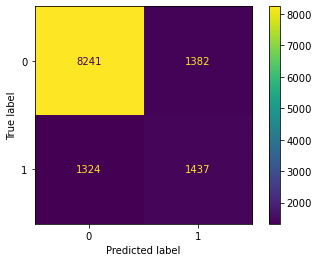

In [20]:
plot_confusion_matrix(tree, X_test, y_test, values_format='.0f')
plt.grid(False)

In [21]:
tree=DecisionTreeClassifier(max_depth=9)
tree.fit(X_train,y_train)
tree.score(X_test,y_test)
confusion_matrix(y_test, tree.predict(X_test))

array([[9006,  617],
       [1463, 1298]], dtype=int64)

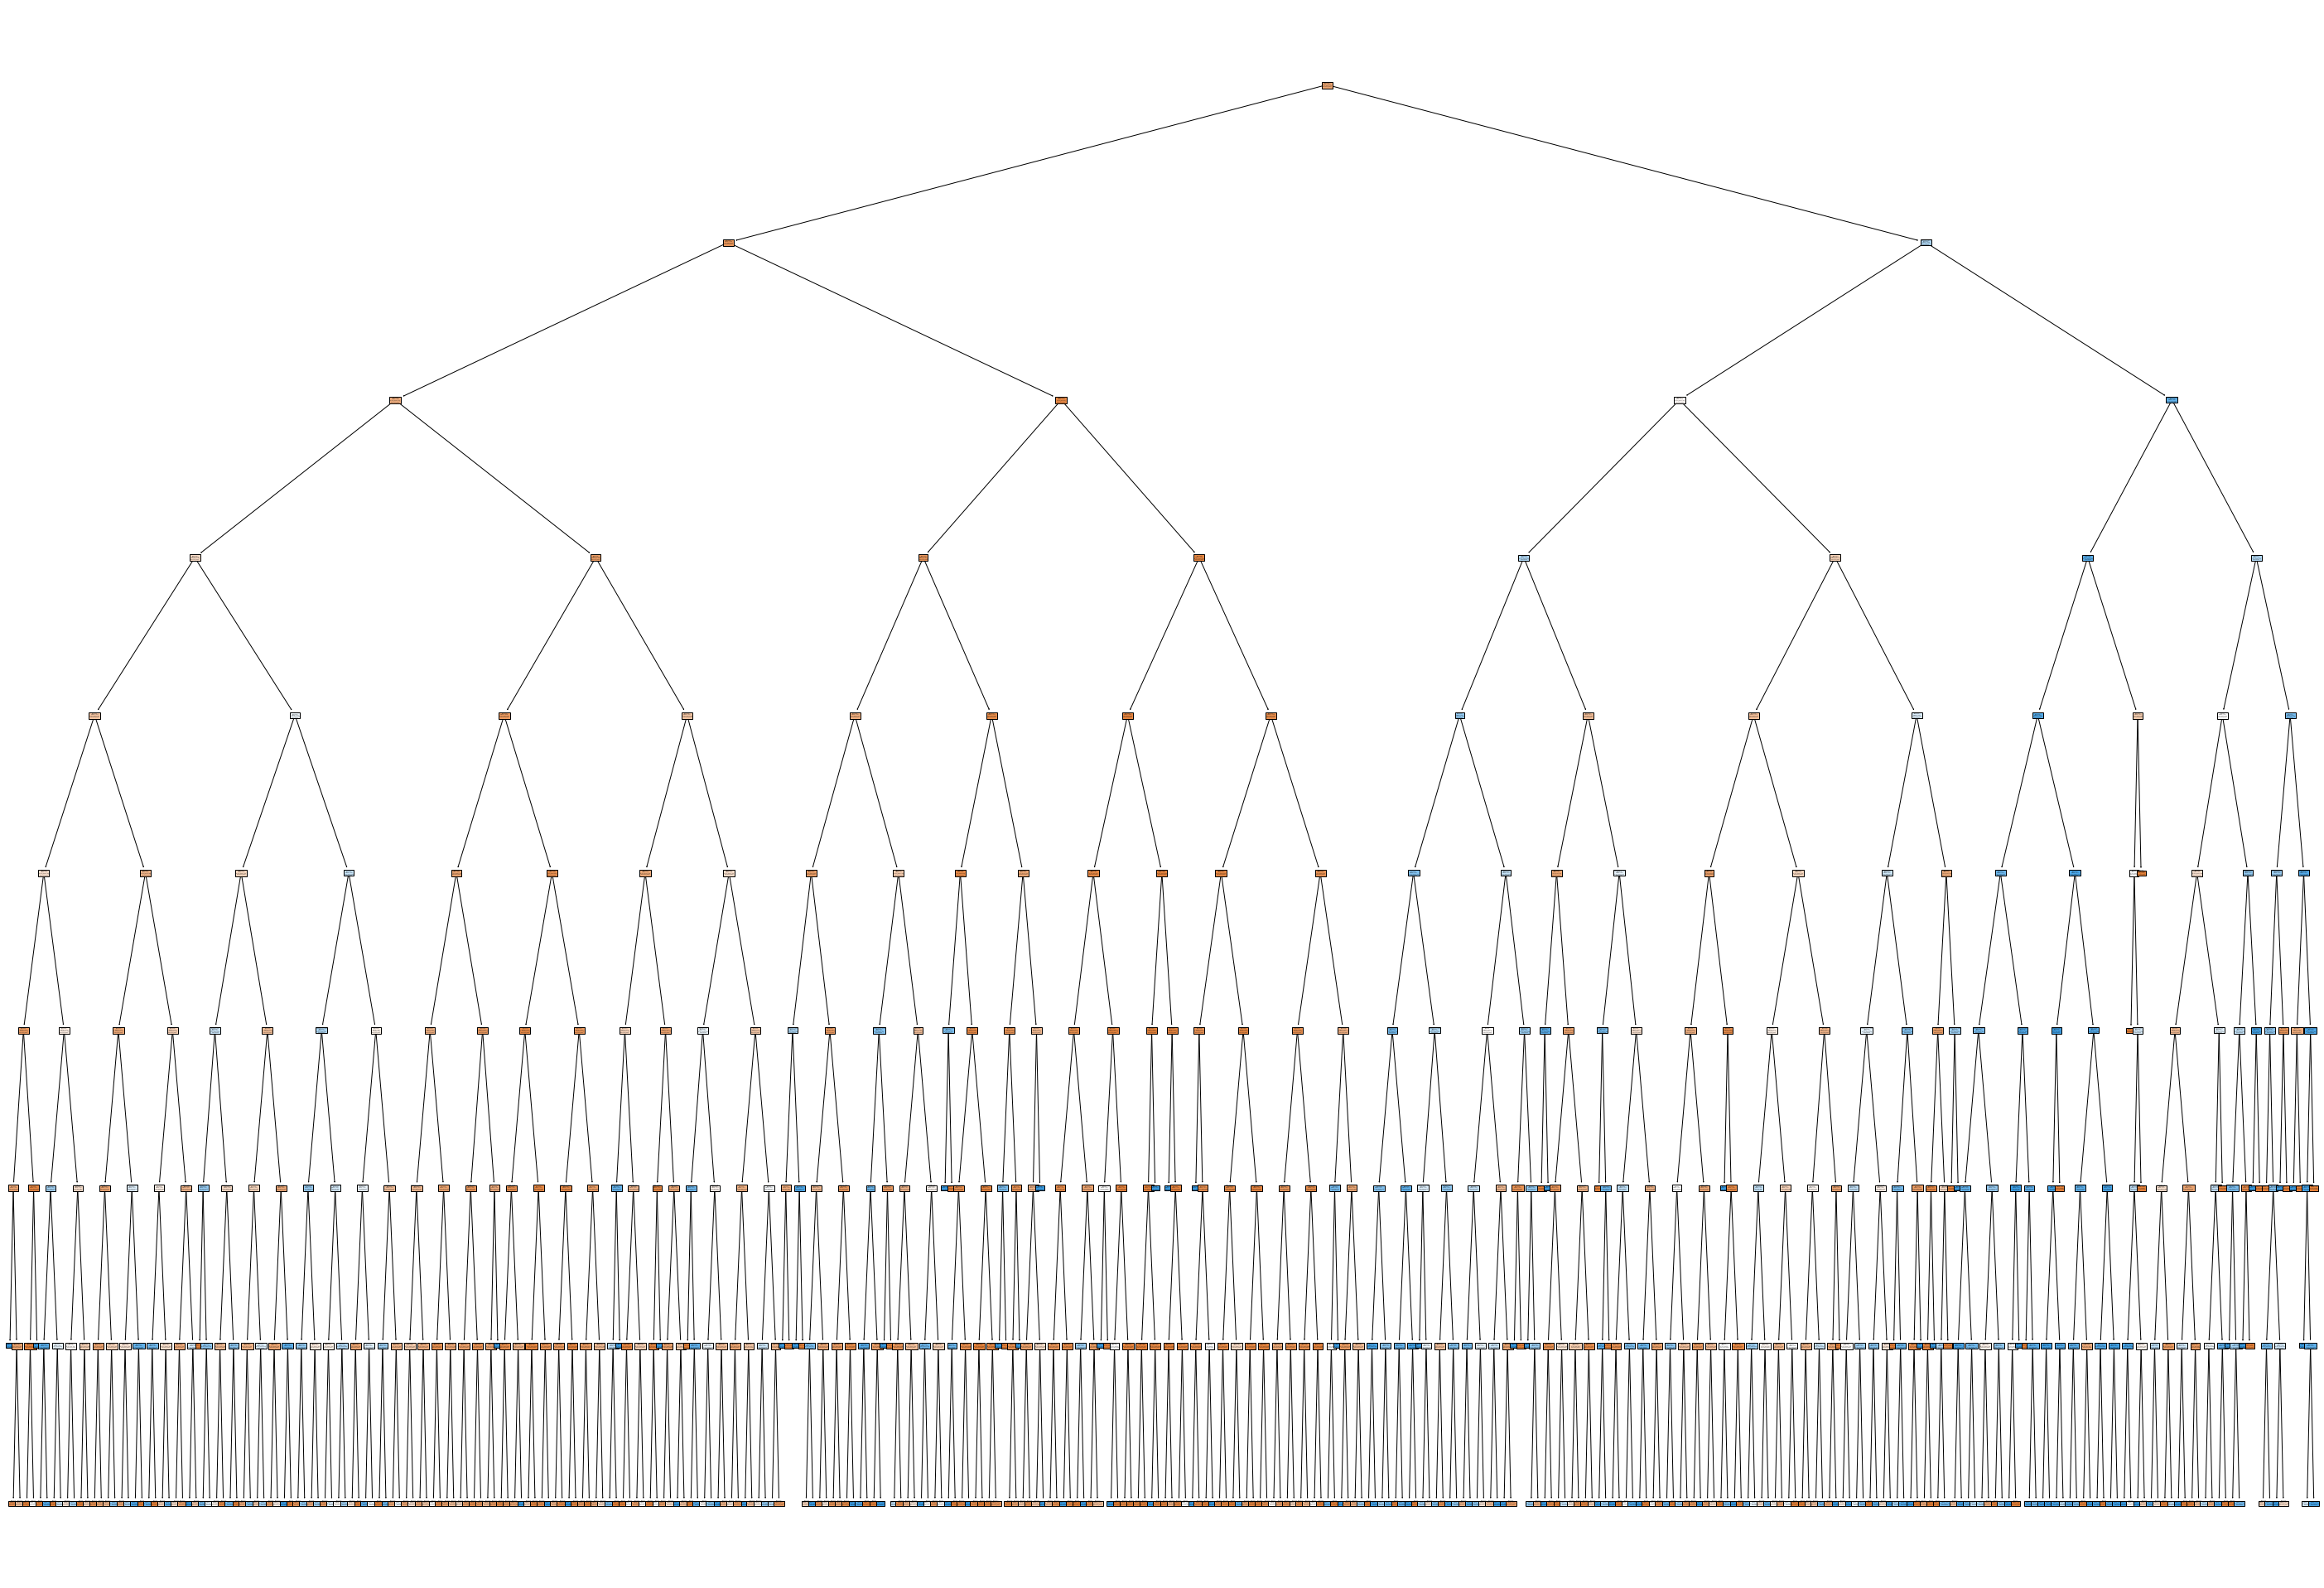

In [22]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(50,35))
plot_tree(tree,feature_names=X_train.columns,class_names=["não_choveu","choveu"],proportion=True,filled=True)
plt.show()

  0%|          | 0/19 [00:00<?, ?it/s]

7

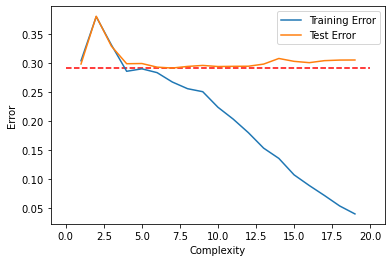

In [23]:
from sklearn.metrics import roc_auc_score
from tqdm.auto import tqdm
complexity = []
error_test = []
error_train = []
for K in tqdm(range(1, 20)):
    complexity.append(K)
    knn = DecisionTreeClassifier(max_depth=K)
    knn.fit(X_train, y_train)
    error_train.append(1 - roc_auc_score(y_train, knn.predict(X_train)))
    error_test.append(1 - roc_auc_score(y_test, knn.predict(X_test)))
plt.plot(complexity, error_train, '-', label='Training Error')
plt.plot(complexity, error_test, '-', label='Test Error')
plt.hlines(min(error_test), 0, 20, colors='red', linestyles='dashed')
plt.xlabel('Complexity')
plt.ylabel('Error')
plt.legend()
error_test.index(min(error_test))+1

In [24]:
pd.DataFrame(tree.feature_importances_,X_train.columns)

,0
mintemp,0.014443
maxtemp,0.008907
rainfall,0.048446
evaporation,0.008894
sunshine,0.162581
humidity9am,0.010402
humidity3pm,0.531255
pressure9am,0.015684
pressure3pm,0.127833
cloud9am,0.005308


In [26]:
!pip install lightgbm --user

In [27]:
from lightgbm import LGBMClassifier

In [46]:
lgb=LGBMClassifier(max_depth=9, n_estimators=200, colsample_bytree=.50, n_jobs=-1)
lgb.fit(X_train,y_train)

LGBMClassifier(colsample_bytree=0.5, max_depth=9, n_estimators=200)

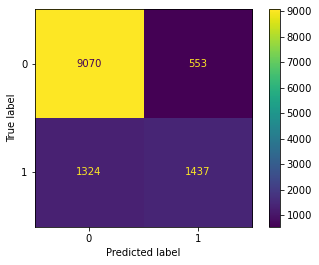

In [47]:
plot_confusion_matrix(lgb, X_test, y_test, values_format='.0f')
plt.grid(False)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

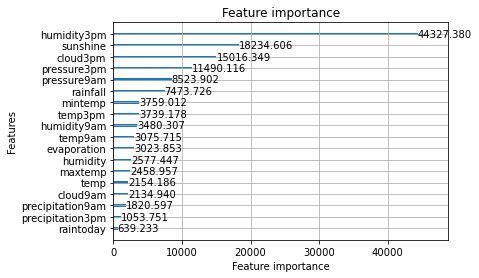

In [49]:
from lightgbm import plot_importance
plot_importance(lgb, importance_type='gain')

In [55]:
#Tentativa  4
X=rain[[ 'rainfall','sunshine', 'humidity3pm','pressure9am', 'pressure3pm', 'cloud3pm']]
y=rain['raintomorrow']

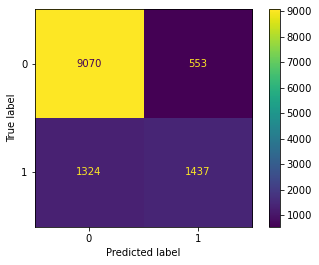

In [57]:
lgb=LGBMClassifier(max_depth=9, n_estimators=200, colsample_bytree=.5, n_jobs=-1)
lgb.fit(X_train,y_train)
plot_confusion_matrix(lgb, X_test, y_test, values_format='.0f')
plt.grid(False)

In [70]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(X_train)

X_std_train=scaler.transform(X_train)
X_std_test=scaler.transform(X_test)

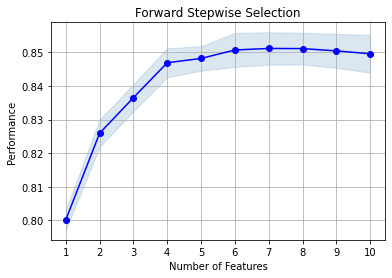

In [74]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
selector = SFS(tree, k_features=10, scoring='roc_auc')
selector.fit(X_std_train, y_train)
fig = plot_sfs(selector.get_metric_dict(), kind='std_err')
plt.title('Forward Stepwise Selection')
plt.grid()
plt.show()

In [75]:
selector.subsets_

{1: {'feature_idx': (6,),
  'cv_scores': array([0.8051607 , 0.79488036, 0.79999089, 0.80836002, 0.79227033]),
  'avg_score': 0.8001324580927222,
  'feature_names': ('6',)},
 2: {'feature_idx': (6, 10),
  'cv_scores': array([0.83686104, 0.82076419, 0.82723336, 0.83132827, 0.81347056]),
  'avg_score': 0.8259314847385852,
  'feature_names': ('6', '10')},
 3: {'feature_idx': (6, 7, 10),
  'cv_scores': array([0.84559255, 0.83618575, 0.83350274, 0.84411959, 0.82326204]),
  'avg_score': 0.8365325326656674,
  'feature_names': ('6', '7', '10')},
 4: {'feature_idx': (4, 6, 7, 10),
  'cv_scores': array([0.85641454, 0.83992615, 0.84797967, 0.85578591, 0.83458546]),
  'avg_score': 0.8469383457701596,
  'feature_names': ('4', '6', '7', '10')},
 5: {'feature_idx': (4, 6, 7, 8, 10),
  'cv_scores': array([0.85686274, 0.84021794, 0.84620996, 0.85676196, 0.84103427]),
  'avg_score': 0.8482173748925248,
  'feature_names': ('4', '6', '7', '8', '10')},
 6: {'feature_idx': (2, 4, 6, 7, 8, 10),
  'cv_scores':

In [80]:
X_train.var()

mintemp              40.646495
maxtemp              47.397994
rainfall             49.793725
evaporation          13.181482
sunshine             14.194717
humidity9am         339.041325
humidity3pm         406.872893
pressure9am          48.419824
pressure3pm          47.980185
cloud9am              7.857419
cloud3pm              7.017994
temp9am              42.381229
temp3pm              45.496387
raintoday             0.173016
temp                102.146622
humidity            669.211272
precipitation3pm     10.061393
precipitation9am     25.282629
dtype: float64

In [81]:
from sklearn.feature_selection import VarianceThreshold, SelectKBest
selector = VarianceThreshold(50)
selector.fit(X_train)
X_train.columns[selector.get_support()]

Index(['humidity9am', 'humidity3pm', 'temp', 'humidity'], dtype='object')

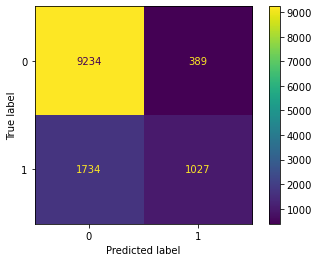

In [84]:
lgb=LGBMClassifier(max_depth=9, n_estimators=200, colsample_bytree=.5, n_jobs=-1)
lgb.fit(X_train[X_train.columns[selector.get_support()]],y_train)
plot_confusion_matrix(lgb, X_test[X_test.columns[selector.get_support()]], y_test, values_format='.0f')
plt.grid(False)

#2nd Try

In [85]:
pd0=pd.read_csv('data/rain_data_aus.csv')
pd1=pd.read_csv('data/wind_table_01.csv')
pd2=pd.read_csv('data/wind_table_02.csv')
pd3=pd.read_csv('data/wind_table_03.csv')
pd4=pd.read_csv('data/wind_table_04.csv')
pd5=pd.read_csv('data/wind_table_05.csv')
pd6=pd.read_csv('data/wind_table_06.csv')
pd7=pd.read_csv('data/wind_table_07.csv')
pd8=pd.read_csv('data/wind_table_08.csv')

In [90]:
pd0.shape

(142193, 23)